<a href="https://colab.research.google.com/github/Occeanstanley/tinytroupe-test2/blob/main/Iris_dataset_Stanley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [ ]:
# 2. Load dataset and create DataFrame
iris = load_iris(as_frame=True)        # convenient to get pandas frame
df = iris.frame.copy()                 # includes features and target
df.rename(columns={"target": "species"}, inplace=True)
df["species"] = df["species"].map(dict(enumerate(iris.target_names)))

print("First 5 rows:")
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Shape: (150, 5)

Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


In [ ]:
# 3. Basic info, data types, summary statistics
print("\nInfo:")
print(df.info())

print("\nSummary statistics for numeric features:")
print(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary statistics for numeric features:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   

# 4. Data cleaning & missing values

In [ ]:
# 4.1 Check missing values
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# Example: if there were missing values, here is where you'd handle them.
# The Iris dataset as provided by sklearn has no missing values,
# but this code shows how you would deal with them.


In [ ]:
# Example strategy: fill numeric NaNs with column mean
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Example strategy: drop rows with any remaining missing values
df = df.dropna()
print("\nShape after cleaning missing values:", df.shape)



Shape after cleaning missing values: (150, 5)


In [ ]:
# 4.2 Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)



Number of duplicate rows: 1
Shape after dropping duplicates: (149, 5)


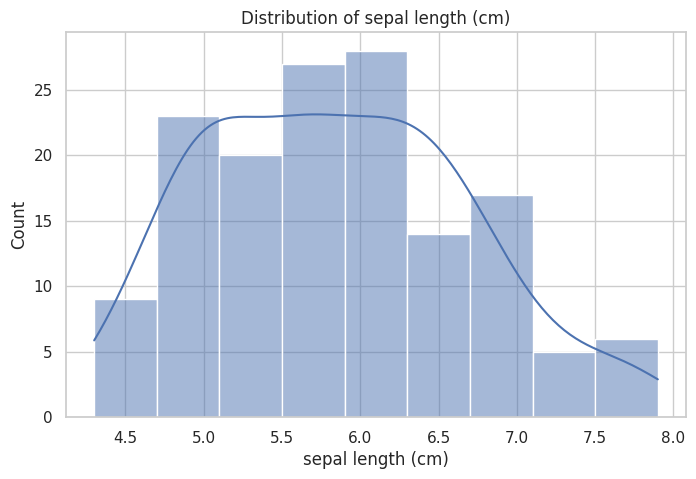

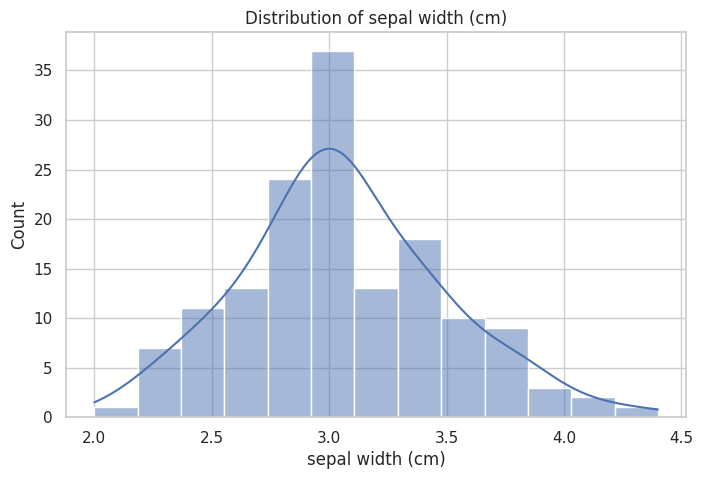

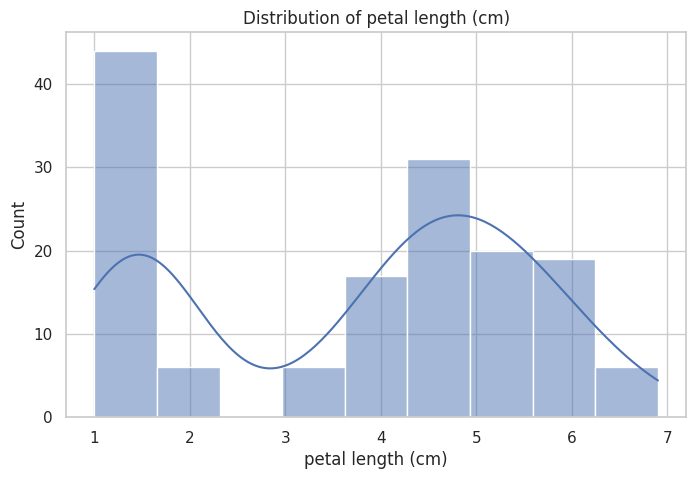

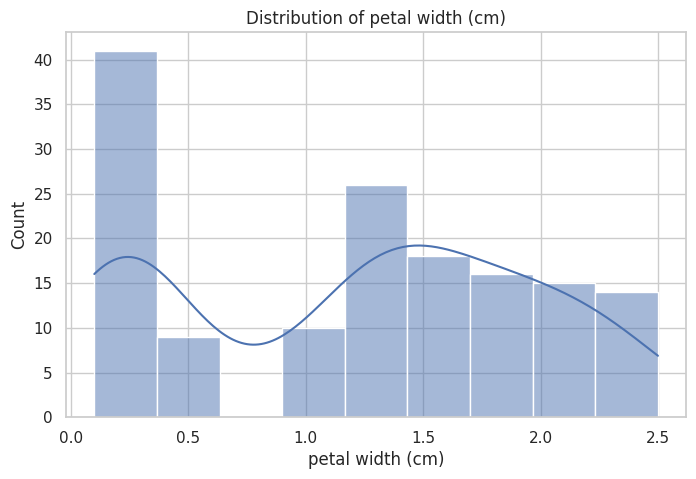

In [ ]:
# 5. Univariate analysis: distributions and outliers

# Histograms / KDE plots
for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


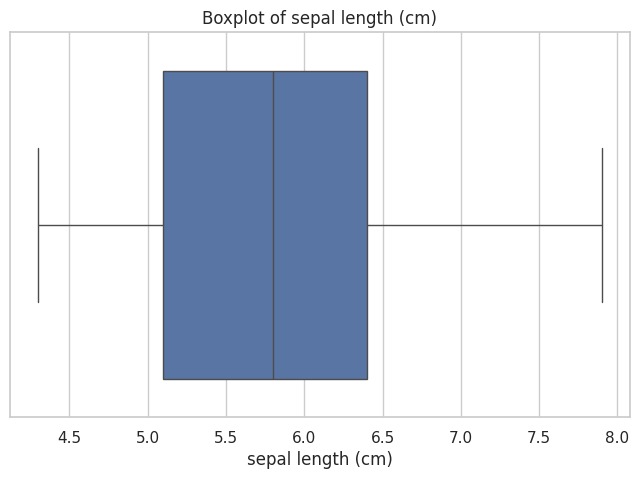

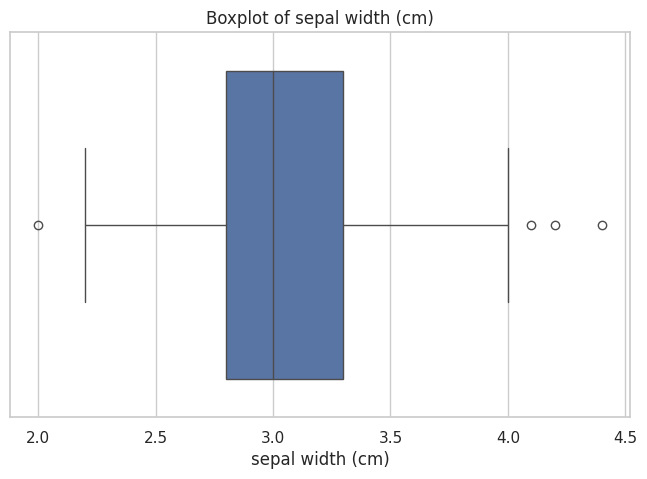

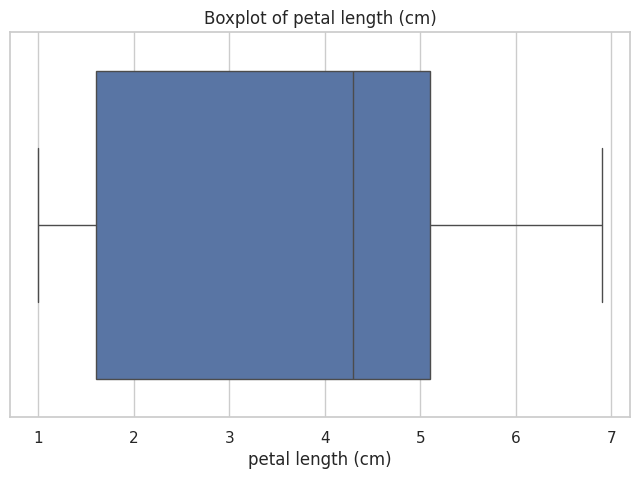

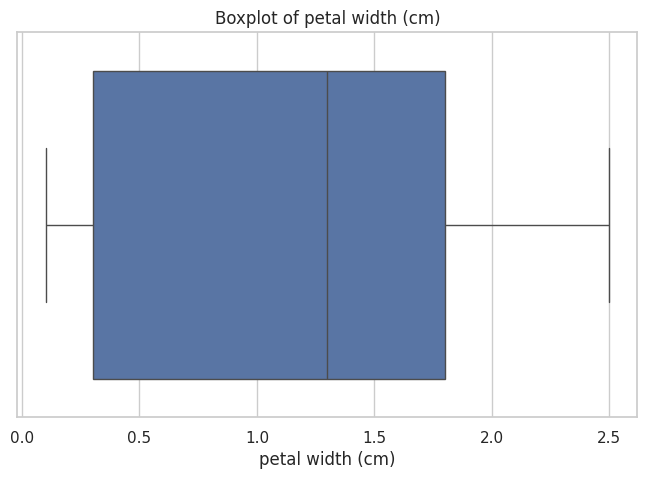

In [ ]:
# Boxplots for outliers
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

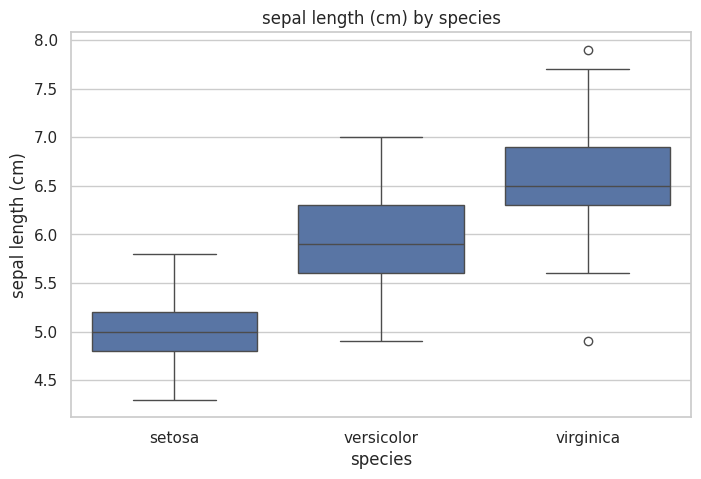

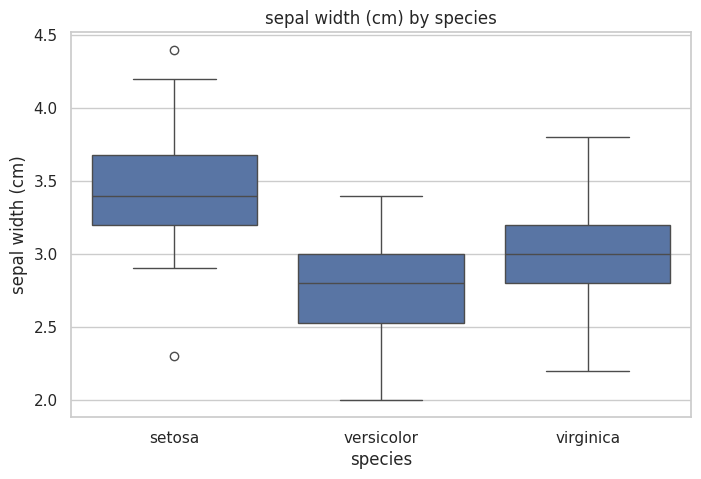

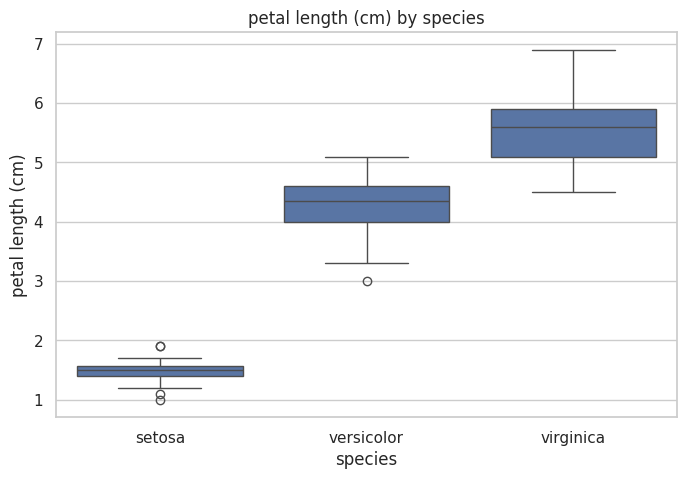

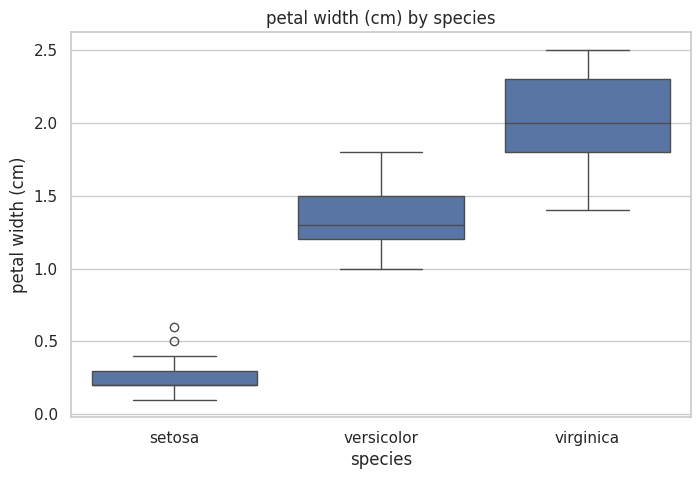

In [ ]:
# Boxplots by species
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x="species", y=col, data=df)
    plt.title(f"{col} by species")
    plt.show()

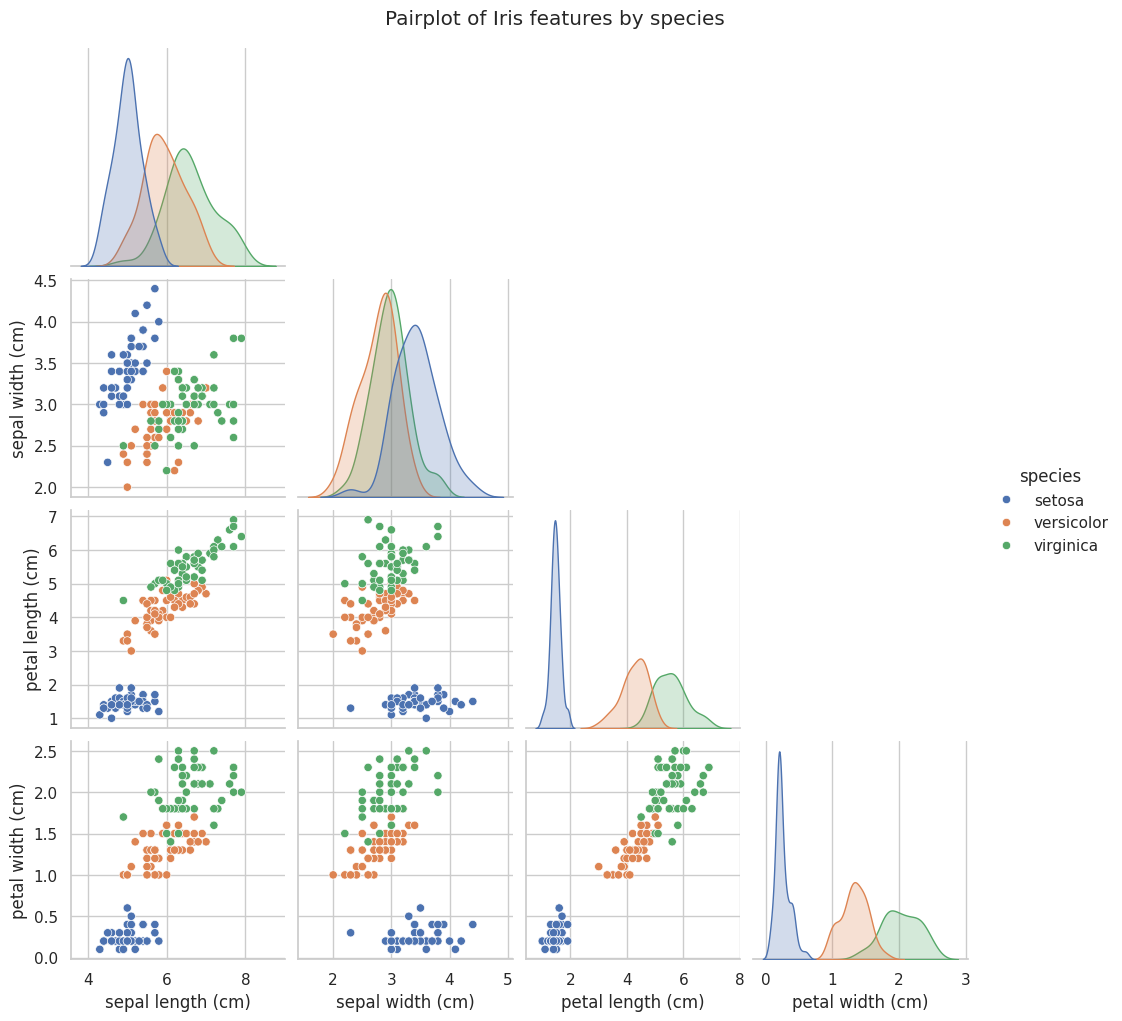

In [ ]:
# 6. Multivariate analysis: relationships & correlations

# Pairplot colored by species
sns.pairplot(df, hue="species", corner=True)
plt.suptitle("Pairplot of Iris features by species", y=1.02)
plt.show()


Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.118129           0.873738   
sepal width (cm)           -0.118129          1.000000          -0.426028   
petal length (cm)           0.873738         -0.426028           1.000000   
petal width (cm)            0.820620         -0.362894           0.962772   

                   petal width (cm)  
sepal length (cm)          0.820620  
sepal width (cm)          -0.362894  
petal length (cm)          0.962772  
petal width (cm)           1.000000  


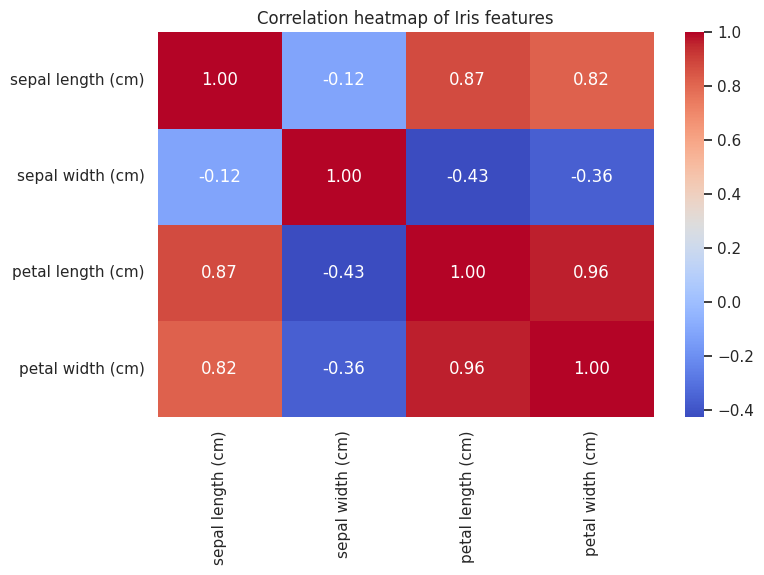

In [ ]:
# Correlation matrix and heatmap (only numeric columns)
corr = df[numeric_cols].corr()
print("\nCorrelation matrix:")
print(corr)

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap of Iris features")
plt.show()

In [ ]:
# 7.1 Petal area and sepal area (length * width)
df["petal_area"] = df["petal length (cm)"] * df["petal width (cm)"]
df["sepal_area"] = df["sepal length (cm)"] * df["sepal width (cm)"]



New engineered feature summary:
       petal_area  sepal_area  petal_sepal_length_ratio
count  149.000000  149.000000                149.000000
mean     5.767919   17.837383                  0.616325
std      4.717353    3.368472                  0.240498
min      0.110000   10.000000                  0.206897
25%      0.420000   15.660000                  0.314815
50%      5.590000   17.680000                  0.707692
75%      9.690000   20.400000                  0.810127
max     15.870000   30.020000                  0.952381


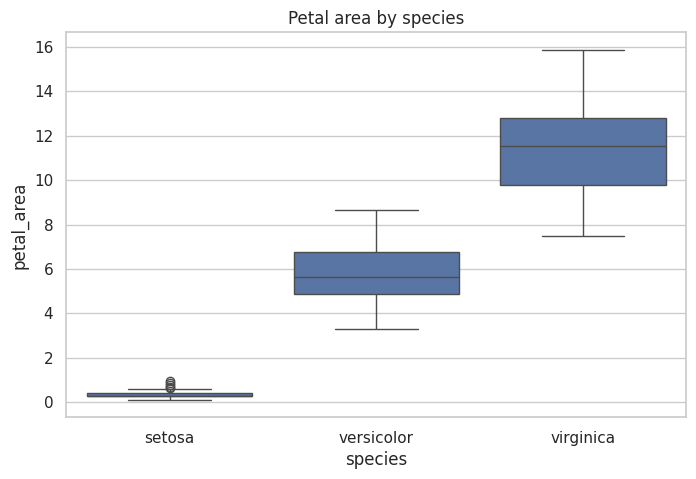

In [ ]:
# 7.2 Petal-to-sepal length ratio
df["petal_sepal_length_ratio"] = df["petal length (cm)"] / df["sepal length (cm)"]

# Inspect new features
print("\nNew engineered feature summary:")
print(df[["petal_area", "sepal_area", "petal_sepal_length_ratio"]].describe())

# Visualize one engineered feature by species
plt.figure()
sns.boxplot(x="species", y="petal_area", data=df)
plt.title("Petal area by species")
plt.show()

In [ ]:
# 8. Model-ready preprocessing

# 8.1 Separate features (X) and target (y)
# Use numeric original + engineered features
feature_cols = [
    "sepal length (cm)",
    "sepal width (cm)",
    "petal length (cm)",
    "petal width (cm)",
    "petal_area",
    "sepal_area",
    "petal_sepal_length_ratio",
]
X = df[feature_cols].values
y = df["species"].astype("category").cat.codes.values  # convert to 0,1,2

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)



Feature matrix shape: (149, 7)
Target vector shape: (149,)


In [ ]:
# 8.2 Train-test split (e.g., 80% train, 20% test, stratified by class)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:", np.bincount(y_train))
print("y_test distribution:", np.bincount(y_test))


X_train shape: (119, 7)
X_test shape: (30, 7)
y_train distribution: [40 40 39]
y_test distribution: [10 10 10]


In [ ]:
# 8.3 Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of scaled training features:")
print(pd.DataFrame(X_train_scaled, columns=feature_cols).head())



First 5 rows of scaled training features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -1.501587          0.769031          -1.339093         -1.179737   
1           0.639824         -0.586742           1.041834          1.186365   
2          -0.192947         -0.134818           0.248192          0.003314   
3          -0.906751          1.672881          -1.055649         -1.048287   
4          -1.263653          0.091144          -1.225715         -1.311187   

   petal_area  sepal_area  petal_sepal_length_ratio  
0   -1.131331   -0.659790                 -1.313587  
1    1.254228    0.011228                  1.090242  
2   -0.159437   -0.230103                  0.508262  
3   -1.059806    0.440915                 -1.026295  
4   -1.152368   -0.883463                 -1.191488  
